In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [5]:
df_train = pd.read_csv("train_data.txt",sep=":::", header = 0,engine = "python")
df_test = pd.read_csv("test_data.txt", sep=":::",header = 0,engine = "python")
df_train.columns = ['SNo','movie_name','category','confession']
df_test.columns = ['SNo','movie_name','confession']

In [6]:
df_test.head()

,SNo,movie_name,confession
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),Before he was known internationally as a mart...
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...


In [7]:
df_train.head()

,SNo,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11520 entries, 0 to 11519
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SNo         11520 non-null  int64 
 1   movie_name  11520 non-null  object
 2   confession  11519 non-null  object
dtypes: int64(1), object(2)
memory usage: 270.1+ KB


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4761 entries, 0 to 4760
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SNo         4761 non-null   int64 
 1   movie_name  4761 non-null   object
 2   category    4761 non-null   object
 3   confession  4761 non-null   object
dtypes: int64(1), object(3)
memory usage: 148.9+ KB


In [ ]:
df_train.describe()

,SNo
count,4761.000000
mean,2382.000000
std,1374.526646
min,2.000000
25%,1192.000000
50%,2382.000000
75%,3572.000000
max,4762.000000


In [ ]:
df_test.isnull().sum()

,0
SNo,0
movie_name,0
confession,0


In [ ]:
df_train.isnull().sum()

,0
SNo,0
movie_name,0
category,0
confession,0


In [ ]:
df_train.count()

,0
SNo,4761
movie_name,4761
category,4761
confession,4761


In [ ]:
df_test.count()

,0
SNo,11520
movie_name,11520
confession,11519


In [ ]:
df_train.iloc[0:8]

,SNo,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
5,7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
6,8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
7,9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."


In [ ]:
df_train.loc[0]

,0
SNo,2
movie_name,Cupid (1997)
category,thriller
confession,A brother and sister with a past incestuous r...


In [ ]:
df_test.shape

(4908, 3)

In [ ]:
df_train.shape

(4761, 4)

Index(['SNo', 'movie_name', 'category', 'confession'], dtype='object')


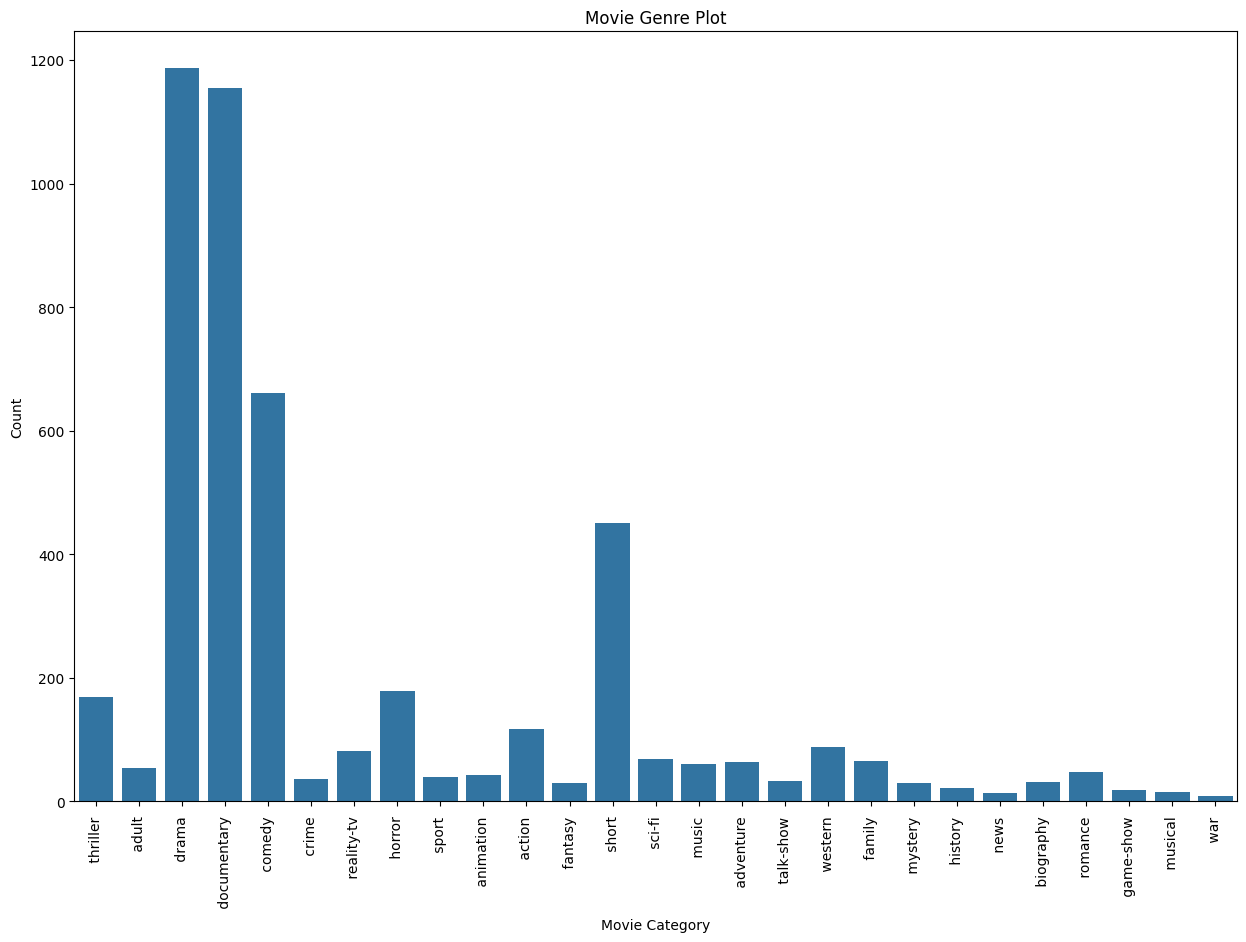

In [ ]:
plt.figure(figsize=(15,10))
print(df_train.columns)
sns.countplot(x='category',data=df_train)
plt.xlabel('Movie Category')
plt.ylabel('Count')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90);
plt.show()

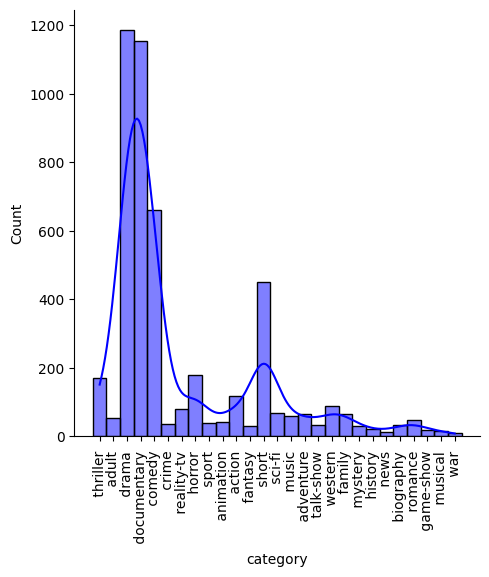

In [ ]:
sns.displot(df_train.category,kde = True,color = "blue")
plt.xticks(rotation=90);

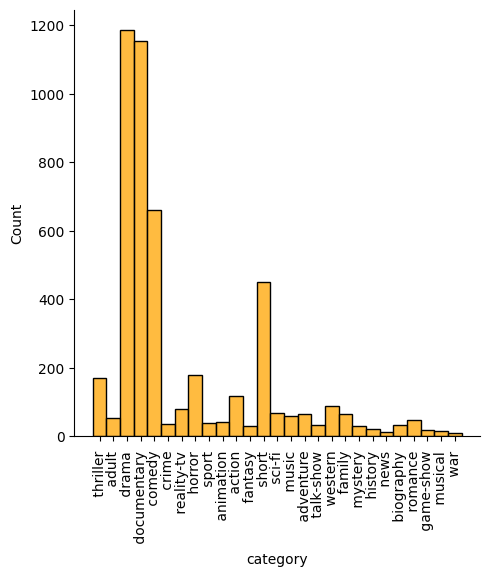

In [ ]:
sns.displot(df_train.category,kde = False,color = "orange")
plt.xticks(rotation=90);

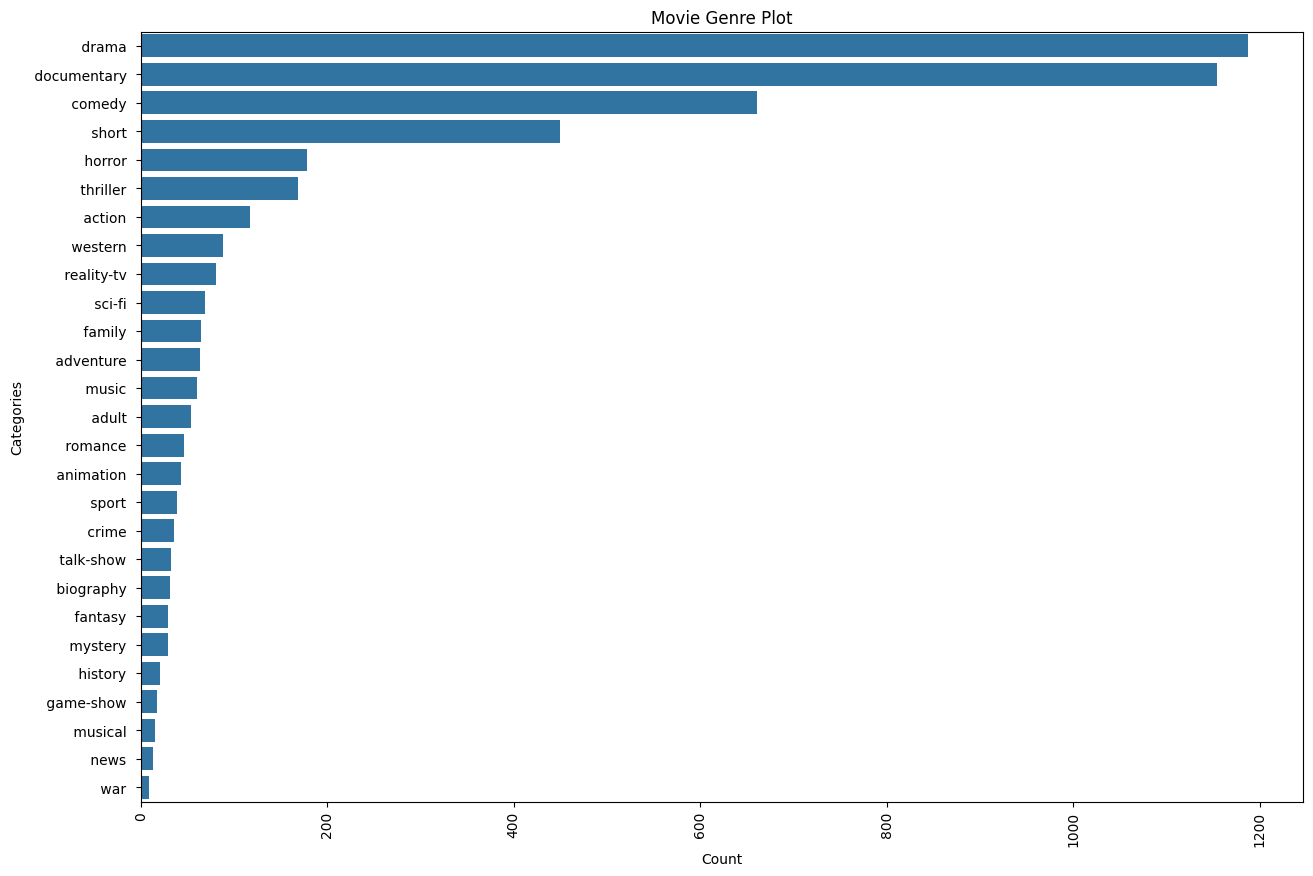

In [ ]:
plt.figure(figsize = (15,10))
count1 = df_train.category.value_counts()
sns.barplot(x = count1,y = count1.index,orient = 'h')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90)
plt.show()

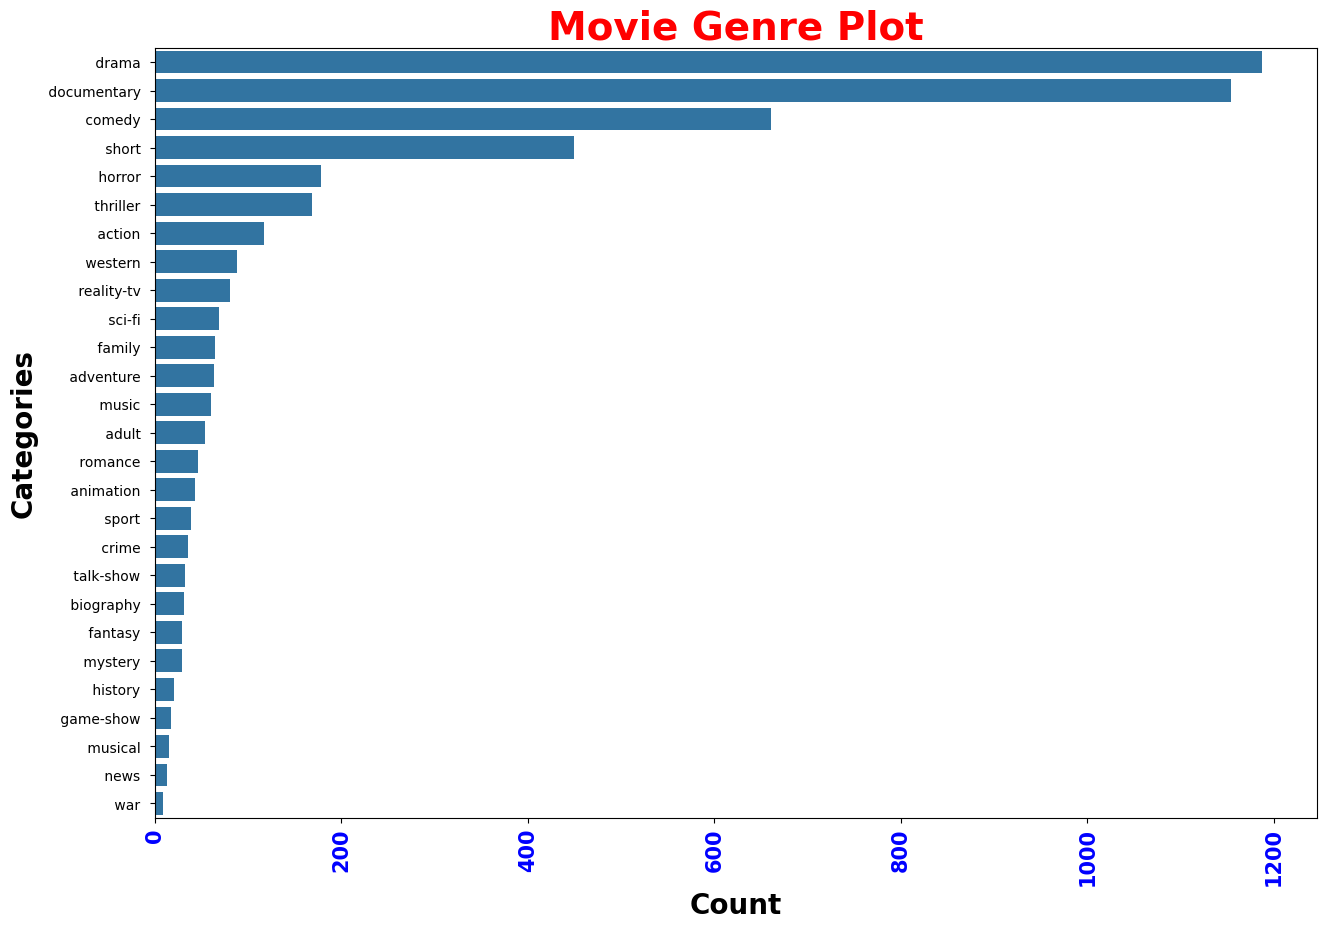

In [ ]:
plt.figure(figsize = (15,10))
count1 = df_train.category.value_counts()
sns.barplot(x = count1,y = count1.index,orient = 'h')
plt.xlabel('Count',fontsize = 20,fontweight = 'bold')
plt.ylabel('Categories',fontsize = 20,fontweight = 'bold')
plt.title('Movie Genre Plot',fontsize = 28,fontweight = 'bold',color = 'red')
plt.xticks(rotation = 90,fontsize = 15,fontweight = 'bold',color = 'blue')
plt.show()

In [ ]:
df_combined = pd.concat([df_train,df_test],axis = 0)

In [ ]:
df_combined.head()

,SNo,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [ ]:
df_combined.shape

(9669, 4)

In [ ]:
df_combined.isnull().any()

,0
SNo,False
movie_name,False
category,True
confession,False


In [ ]:
df_combined.count()

,0
SNo,9669
movie_name,9669
category,4761
confession,9669


In [ ]:
encoder = LabelEncoder()
df_combined["category"] = encoder.fit_transform(df_combined["category"].values)

In [ ]:
encoder = LabelEncoder()
df_combined["movie_name"] = encoder.fit_transform(df_combined["movie_name"].values)

In [ ]:
df_combined.head()

,SNo,movie_name,category,confession
0,2,2756,24,A brother and sister with a past incestuous r...
1,3,9577,1,As the bus empties the students for their fie...
2,4,8539,8,To help their unemployed father make ends mee...
3,5,8661,8,The film's title refers not only to the un-re...
4,6,6507,7,Quality Control consists of a series of 16mm ...


In [ ]:
df_combined.category = df_combined.category.fillna(df_combined.category.mean())

In [ ]:
df_combined.count()

,0
SNo,9669
movie_name,9669
category,9669
confession,9669


In [ ]:
df_combined.duplicated().values.any()

False

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
X = vectorizer.fit_transform(df_combined["confession"])

In [ ]:
df_combined.head()

,SNo,movie_name,category,confession
0,2,2756,24,A brother and sister with a past incestuous r...
1,3,9577,1,As the bus empties the students for their fie...
2,4,8539,8,To help their unemployed father make ends mee...
3,5,8661,8,The film's title refers not only to the un-re...
4,6,6507,7,Quality Control consists of a series of 16mm ...


In [ ]:
y = df_combined["category"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
naive_bayes_model = MultinomialNB()

In [ ]:
naive_bayes_model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
nb_predictions = naive_bayes_model.predict(X_test)

In [ ]:
print("NAive Bayes Model:")
print(confusion_matrix(y_test,nb_predictions))
print(classification_report(y_test,nb_predictions))
print("Accuracy:",accuracy_score(y_test,nb_predictions))
print("r2_Score:",r2_score(y_test,nb_predictions))

NAive Bayes Model:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0  26]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   7]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0  11]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   6]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 130]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   4]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 231]
 [  0   0   0   0   0   0   0   0   0   0   0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
logistic_regression_model = LogisticRegression()

In [ ]:
logistic_regression_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr_predictions = logistic_regression_model.predict(X_test)

In [ ]:
print("logistic_regression_model:")
print(confusion_matrix(y_test,lr_predictions))
print(classification_report(y_test,lr_predictions))
print("Accuracy:",accuracy_score(y_test,lr_predictions))
print("r2_Score:",r2_score(y_test,lr_predictions))

logistic_regression_model:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0  26]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   7]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0  10]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   6]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   2]
 [  0   0   0   0   0   0   0   1   2   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 127]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   4]
 [  0   0   0   0   0   0   0  18   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 213]
 [  0   0   0   0   0   0   0   0   8

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
